<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Download the webpage at the url


In [4]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here
table = soup.find("table")
table

<table>
<tbody>
<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>
<tr>
<td>1</td>
<td>Python</td>
<td>Guido van Rossum</td>
<td>$114,383</td>
<td>Easy</td>
</tr>
<tr>
<td>2</td>
<td>Java</td>
<td>James Gosling</td>
<td>$101,013</td>
<td>Easy</td>
</tr>
<tr>
<td>3</td>
<td>R</td>
<td>Robert Gentleman, Ross Ihaka</td>
<td>$92,037</td>
<td>Hard</td>
</tr>
<tr>
<td>4</td>
<td>Javascript</td>
<td>Netscape</td>
<td>$110,981</td>
<td>Easy</td>
</tr>
<tr>
<td>5</td>
<td>Swift</td>
<td>Apple</td>
<td>$130,801</td>
<td>Easy</td>
</tr>
<tr>
<td>6</td>
<td>C++</td>
<td>Bjarne Stroustrup</td>
<td>$113,865</td>
<td>Hard</td>
</tr>
<tr>
<td>7</td>
<td>C#</td>
<td>Microsoft</td>
<td>$88,726</td>
<td>Hard</td>
</tr>
<tr>
<td>8</td>
<td>PHP</td>
<td>Rasmus Lerdorf</td>
<td>$84,727</td>
<td>Easy</td>
</tr>
<tr>
<td>9</td>
<td>SQL</td>
<td>Donald D. Chamberlin, Raymond F. Boyce.</td>
<td>$84,793</td>
<td>Easy</td>
</tr>
<tr>
<td>10</t

Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# your code goes here
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    columns = row.find_all('td') # in html a column is represented by the tag <td>
    language_name = columns[1].getText() # store the value in column 3 as color_name
    avr_annual_salary = columns[3].getText() # store the value in column 4 as color_code
    print("{}--->{}".format(language_name, avr_annual_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


In [60]:
import pandas as pd

# Almacenar los datos en una lista de diccionarios
data = []

for row in table.find_all('tr'):
    columns = row.find_all('td')
    language_name = columns[1].getText()
    avr_annual_salary = columns[3].getText()
    data.append({'Programming Language': language_name, 'Average Salary ($)': avr_annual_salary})

# Crear DataFrame desde la lista de diccionarios
df = pd.DataFrame(data)
df = df.drop(0) # Eliminar la 

# Convertir el salario promedio a tipo numérico
df['Average Salary ($)'] = df['Average Salary ($)'].str.replace('$', '').str.replace(',', '').astype(float)

# Ordenar el DataFrame por salario promedio de forma descendente
df_sorted = df.sort_values(by='Average Salary ($)', ascending=True)

pd.options.display.float_format = '{:,.2f}'.format

# Imprimir las primeras filas del DataFrame
print(df_sorted)


   Programming Language  Average Salary ($)
8                   PHP           84,727.00
9                   SQL           84,793.00
7                    C#           88,726.00
3                     R           92,037.00
10                   Go           94,082.00
2                  Java          101,013.00
4            Javascript          110,981.00
6                   C++          113,865.00
1                Python          114,383.00
5                 Swift          130,801.00


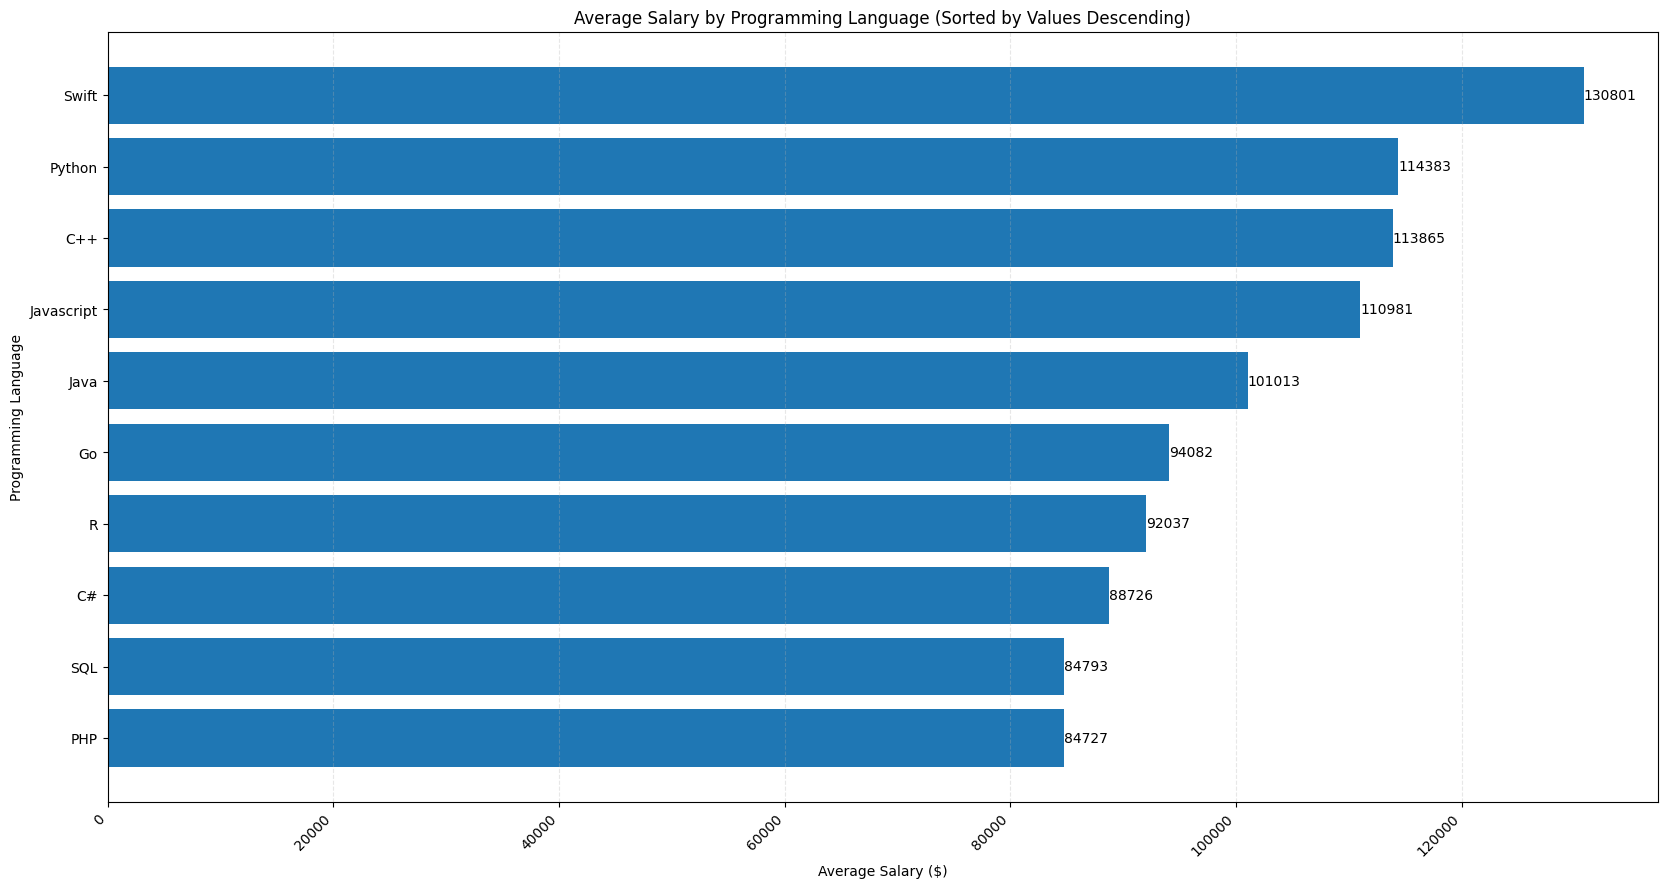

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize= (20, 10))
bars = plt.barh(df_sorted["Programming Language"], df_sorted["Average Salary ($)"])
plt.xlabel('Average Salary ($)')
plt.ylabel('Programming Language')
plt.title('Average Salary by Programming Language (Sorted by Values Descending)')
plt.xticks(rotation=45, ha='right')
plt.bar_label(bars)
plt.grid(axis='x', linestyle='--', alpha=0.3)

In [ ]:
tabla =table.find_all('tr') # Esto sirve para verificar la estrutura <td>
tabla

[<tr>
 <td>No.</td>
 <td>Language</td>
 <td>Created By</td>
 <td>Average Annual Salary</td>
 <td>Learning Difficulty</td>
 </tr>,
 <tr>
 <td>1</td>
 <td>Python</td>
 <td>Guido van Rossum</td>
 <td>$114,383</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>2</td>
 <td>Java</td>
 <td>James Gosling</td>
 <td>$101,013</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>3</td>
 <td>R</td>
 <td>Robert Gentleman, Ross Ihaka</td>
 <td>$92,037</td>
 <td>Hard</td>
 </tr>,
 <tr>
 <td>4</td>
 <td>Javascript</td>
 <td>Netscape</td>
 <td>$110,981</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>5</td>
 <td>Swift</td>
 <td>Apple</td>
 <td>$130,801</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>6</td>
 <td>C++</td>
 <td>Bjarne Stroustrup</td>
 <td>$113,865</td>
 <td>Hard</td>
 </tr>,
 <tr>
 <td>7</td>
 <td>C#</td>
 <td>Microsoft</td>
 <td>$88,726</td>
 <td>Hard</td>
 </tr>,
 <tr>
 <td>8</td>
 <td>PHP</td>
 <td>Rasmus Lerdorf</td>
 <td>$84,727</td>
 <td>Easy</td>
 </tr>,
 <tr>
 <td>9</td>
 <td>SQL</td>
 <td>Donald D. Chamberlin, Raymond F. Boy

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
